In [9]:
import matplotlib.pyplot as plt
import numpy as np
from json import loads

In [41]:
path = "test_not_game.txt"

# Verify blocks

In [42]:
import hashlib

def verify_blocks(blocks: list[str]) -> bool:
    content = "\n\n".join(blocks)

    # Get rid of last line with the hash
    content, hashline = content.rsplit("\n", 1)

    # Hash content, compare with hashline
    actual_hash = hashlib.sha256(content.encode('utf-8')).hexdigest()

    return hashline == "Hash|" + actual_hash

# Bins to list

Turns bins with counts into an list of data

bin: counts

Performance is O(N^2) which indicates that this could be improved further

Although since it's only used for data processing and not production it is a good enough; we don't need to prematurely optimize

In [43]:
def bin_to_list(dict) -> list[int]:
    result = []

    for key in dict.keys():
        key = int(key)

        for x in range(dict[key]):
            result.append(key)

    return result


# Viewing data for a single file

Block index 55 is tampered


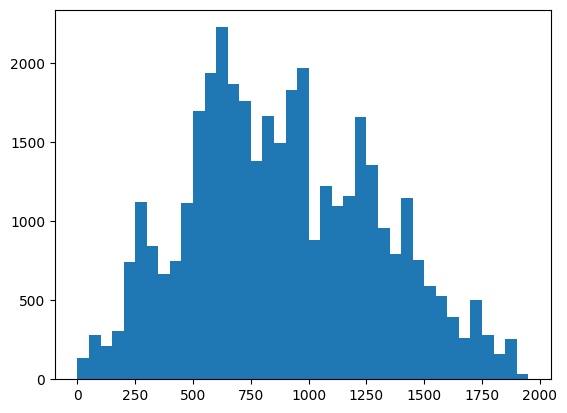

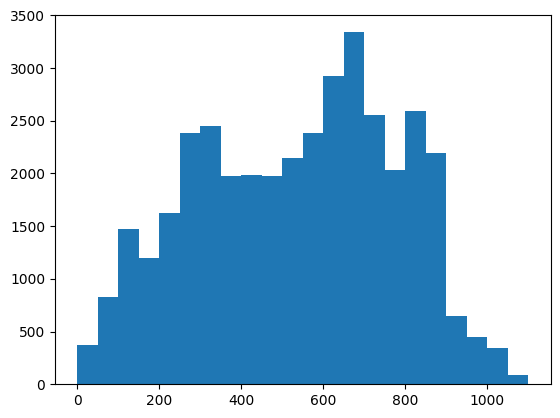

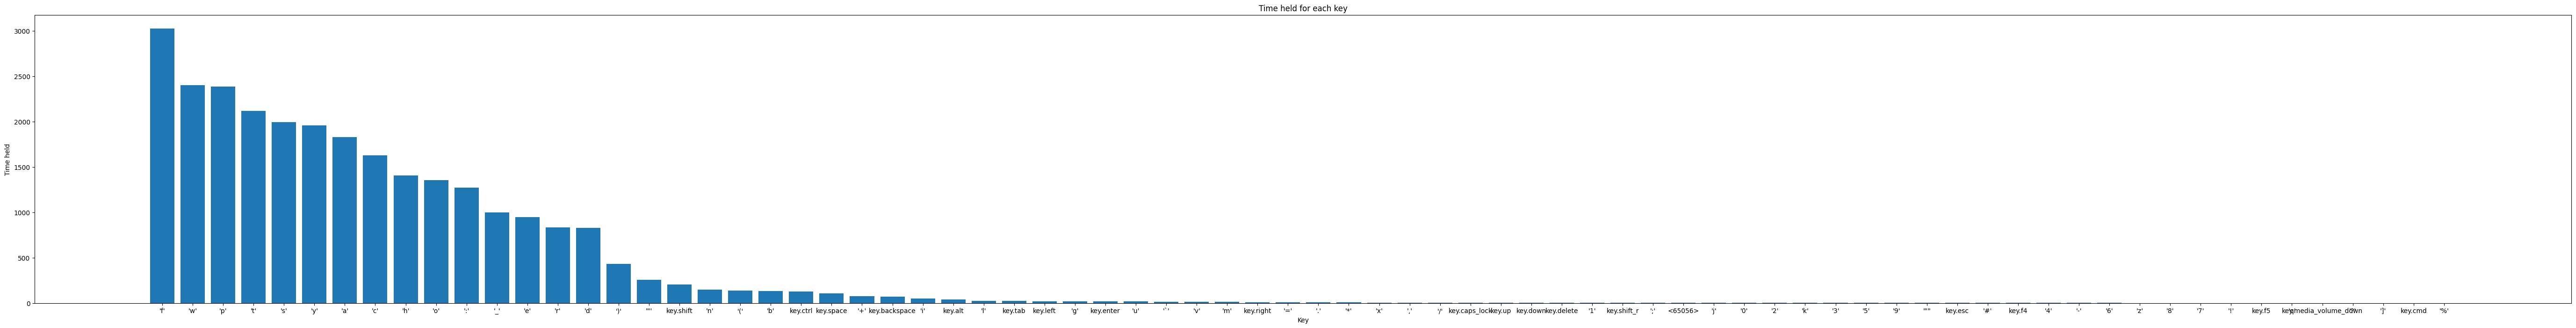

In [45]:
file = open(path, "r")

contents = file.read()

file.close()

blocks = contents.split("\n\n")

x_pos = {}
y_pos = {}
total_key_time_held = {}
total_keyup = {}
total_mouse_held = {}
total_mouseup = {}

for x in range(1, len(blocks)):
    if not verify_blocks(blocks[:x+1]):
        print("Block index " + str(x) + " is tampered")
        continue
        # Don't break because it might just be some blank line

    raw_block = blocks[x]
    raw_lines = raw_block.split('\n')

    block = {}
    for line in raw_lines:
        key, value = line.split('|')

        block[key] = value
    
    # mouse histogram
    block['x_histogram'] = loads(block['x_histogram'])
    block['y_histogram'] = loads(block['y_histogram'])

    for bin in block['x_histogram'].keys():
        bin = int(bin)

        if not bin in x_pos.keys():
            x_pos[bin] = block['x_histogram'][str(bin)]
        else:
            x_pos[bin] += block['x_histogram'][str(bin)]
    
    for bin in block['y_histogram'].keys():
        bin = int(bin)

        if not bin in y_pos.keys():
            y_pos[bin] = block['y_histogram'][str(bin)]
        else:
            y_pos[bin] += block['y_histogram'][str(bin)]
    
    # keys
    block['key_time_held'] = loads(block['key_time_held'])
    for key_raw in block['key_time_held'].keys():
        key = key_raw.lower()

        if not key in total_key_time_held.keys():
            total_key_time_held[key] = block['key_time_held'][key_raw]
        else:
            total_key_time_held[key] += block['key_time_held'][key_raw]
    


    block['keyup_counts'] = loads(block['keyup_counts'])
    for key_raw in block['keyup_counts'].keys():
        key = key_raw.lower()

        if not key in total_keyup.keys():
            total_keyup[key] = block['keyup_counts'][key_raw]
        else:
            total_keyup[key] += block['keyup_counts'][key_raw]
    
    # mouse
    block['time_mouse_held'] = loads(block['time_mouse_held'])
    for mouse in block['time_mouse_held'].keys():
        if not mouse in total_mouse_held.keys():
            total_mouse_held[mouse] = block['time_mouse_held'][mouse]
        else:
            total_mouse_held[mouse] += block['time_mouse_held'][mouse]
    

    block['mouseup_counts'] = loads(block['mouseup_counts'])
    for mouse in block['mouseup_counts'].keys():
        if not mouse in total_mouseup.keys():
            total_mouseup[mouse] = block['mouseup_counts'][mouse]
        else:
            total_mouseup[mouse] += block['mouseup_counts'][mouse]




x_list = bin_to_list(x_pos)
x_bins = list(x_pos.keys())
x_bins.append(max(x_bins) + 50)
x_bins = sorted(x_bins)
plt.figure()
plt.hist(x_list, bins=x_bins)

y_list = bin_to_list(y_pos)
y_bins = list(y_pos.keys())
y_bins.append(max(y_bins) + 50)
y_bins = sorted(y_bins)
plt.figure()
plt.hist(y_list, bins=y_bins)

total_key_time_held = dict(sorted(total_key_time_held.items(), key=lambda item: item[1], reverse=True))
plt.figure(figsize=[70, 8])
plt.xlabel("Key")
plt.ylabel("Time held")
plt.title("Time held for each key")
plt.bar(total_key_time_held.keys(), total_key_time_held.values())

plt.show()